In [13]:
import pandas as pd
import matplotlib.pyplot as plt

nwhl_df = pd.read_csv('hackathon_nwhl.csv')

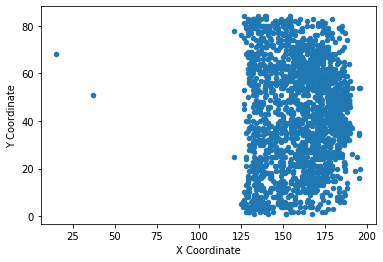

In [6]:
nwhl_attempts = nwhl_df.loc[nwhl_df['Event'].isin(['Shot','Goal'])]
nwhl_attempts.plot.scatter('X Coordinate','Y Coordinate')

A shot on goal defined: https://en.wikipedia.org/wiki/Shot_on_goal_(ice_hockey)

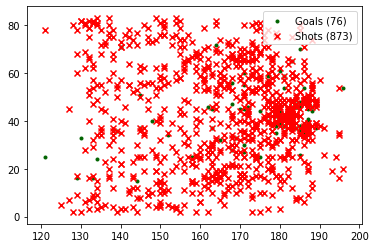

In [25]:
nwhl_net_attempts = nwhl_df.loc[nwhl_df['Detail 2'].eq('On Net')]

leg_dict = {'Shot':{'color':'red',
                    'marker':'x'},
            'Goal':{'color':'darkgreen',
                    'marker':'.'}}

shot_fig, shot_ax = plt.subplots(facecolor='white')

for event, event_df in nwhl_net_attempts.groupby('Event'):
    n = event_df.shape[0]
    shot_ax.scatter('X Coordinate','Y Coordinate',
                    data=event_df, **leg_dict[event], label=f'{event}s ({n})')

shot_ax.legend()